In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import numpy as np
import fnmatch
import os
import random

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

In [4]:
dataset = "/media/marcvaldivia/UB/TFG/dataset"
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [5]:
restaurants = ["%s/%s" % (dataset, x) for x in os.listdir(dataset) if os.path.isdir("%s/%s" % (dataset, x))]

In [6]:
number_of_dishesh = 1
number_of_samples = 5
number_of_samples_reduced = len(colors)
ingredients = np.load(dataset + "/data/ingredients.npy")
recognition = np.load(dataset + "/data/recognition.npy")
family = np.load(dataset + "/data/family.npy")
splitted = [(0, 1092, ingredients), (1092, 1292, recognition), (1292, 1303, family)]
#splitted = [(0, 200, recognition), (200, 211, family)]

In [61]:
groups = list()
cnn_groups = list()
for i in range(number_of_dishesh):
    r = random.choice(restaurants)
    menus = ["%s/%s" % (r, x) for x in os.listdir(r) if os.path.isdir("%s/%s" % (r, x))]
    m = random.choice(menus)
    dishes = ["%s/%s" % (m, x) for x in os.listdir(m) if os.path.isdir("%s/%s" % (m, x))]
    d = random.choice(dishes)
    npys = ["%s/%s" % (d, x) for x in os.listdir(r"%s" % d) if x.endswith(".npy") and not x.endswith("cnn.npy")]
    cnns = ["%s/%s" % (d, x) for x in os.listdir(r"%s" % d) if x.endswith("cnn.npy")]
    s_group = list()
    s_cnn = list()
    for npy in npys:
        s_group.append(np.load(npy))
    groups.append([d, s_group])
    for npy in cnns:
        s_cnn.append(np.load(npy))
    cnn_groups.append([d, s_cnn])

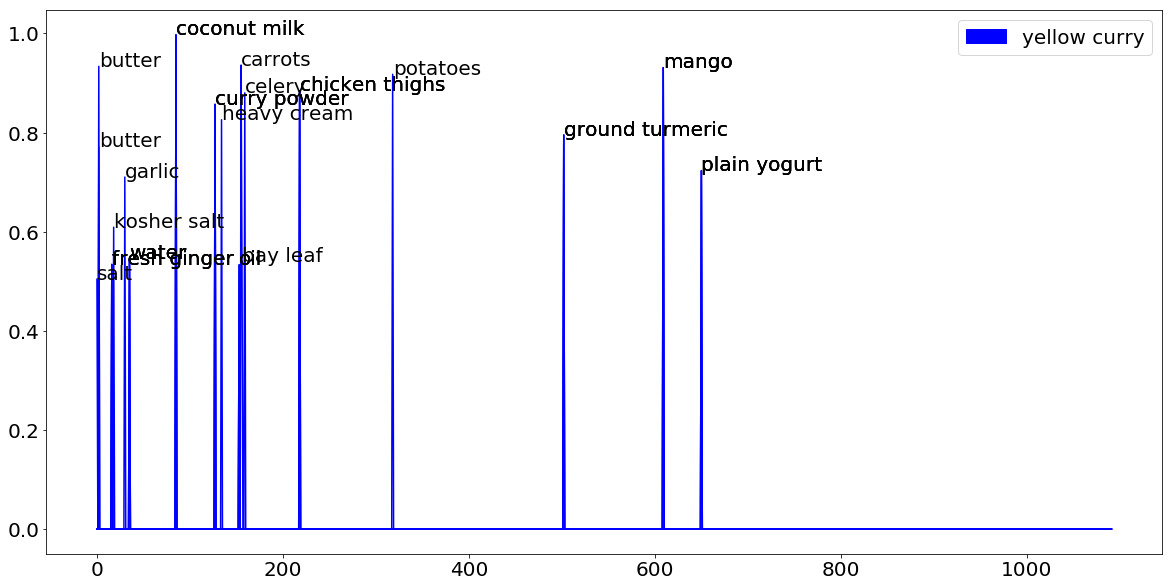

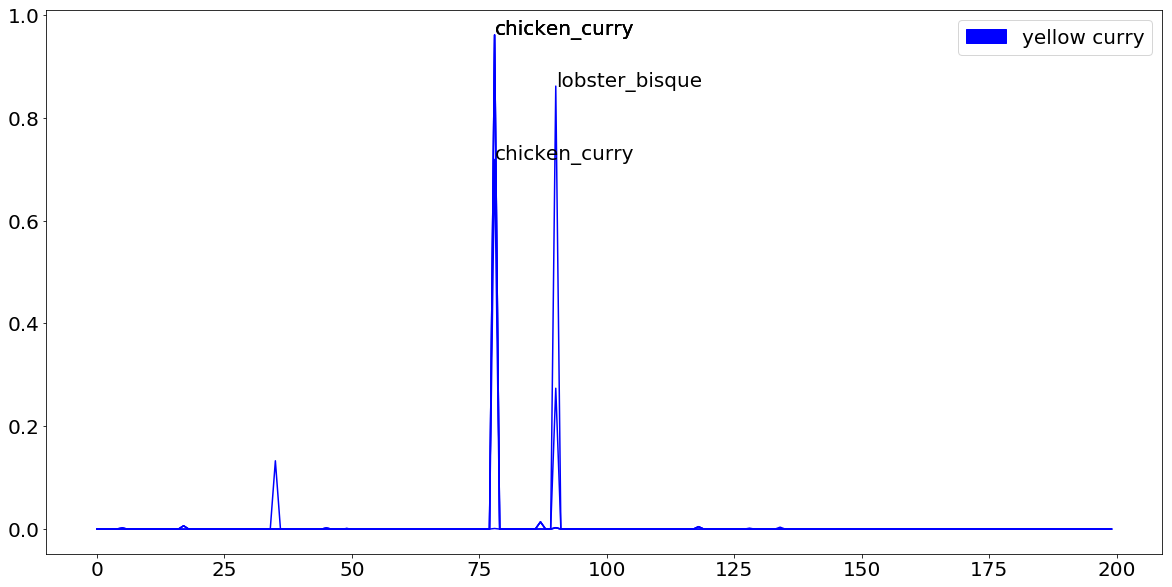

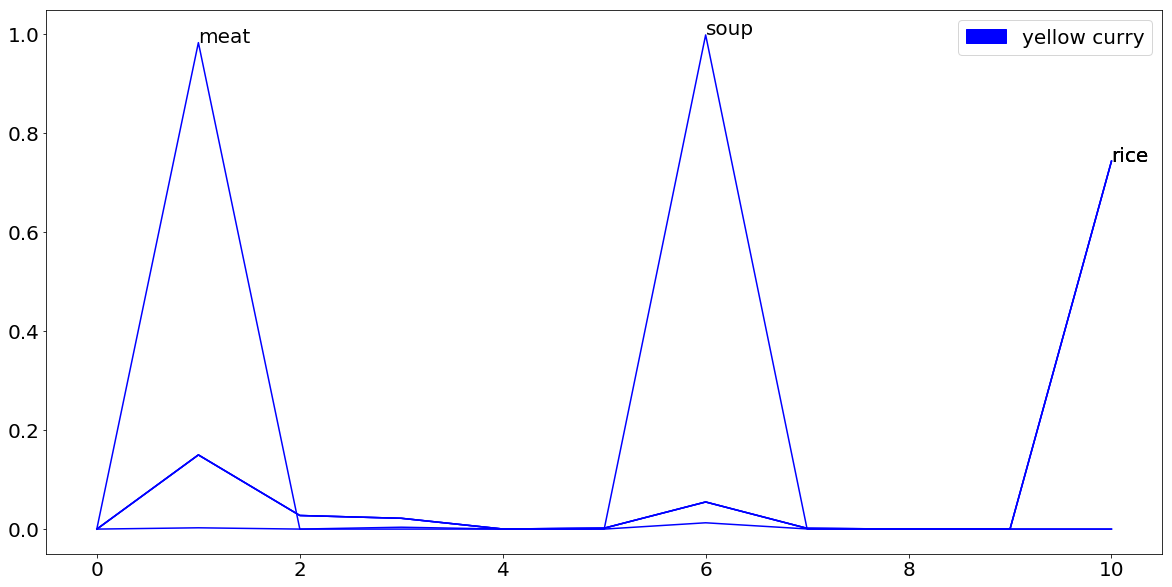

In [62]:
for s in splitted:
    plt.figure(figsize=(20,10))
    handles = list()
    for idx, g in enumerate(groups):
        for idx2, s_g in enumerate(random.sample(g[1], number_of_samples)):
            for x, el in enumerate(s_g[s[0]:s[1]]):
                if el > 0.5:
                    to_show = x
                    d1 = s[2].item()
                    for name in d1.keys():
                        if d1[name] == x:
                            to_show = name
                    plt.annotate(to_show, xy=(x,el))
            plt.plot(s_g[s[0]:s[1]], colors[idx])
        patch = mpatches.Patch(color=colors[idx], label=g[0].split("/")[-1].decode("utf-8").encode('ascii', 'ignore'))
        handles.append(patch)
    plt.legend(handles=handles)
    plt.show()

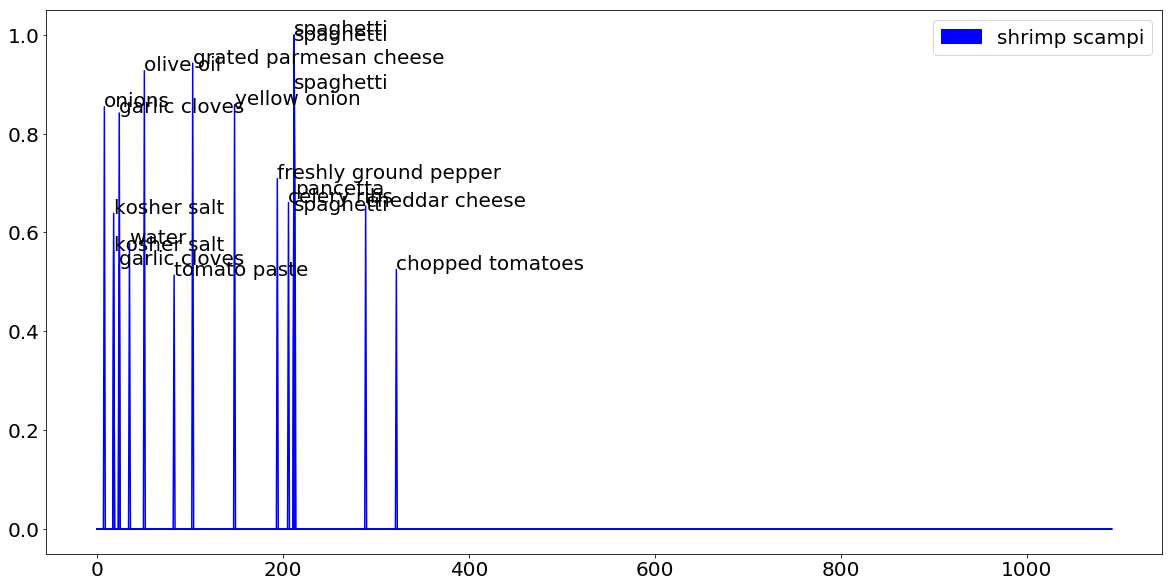

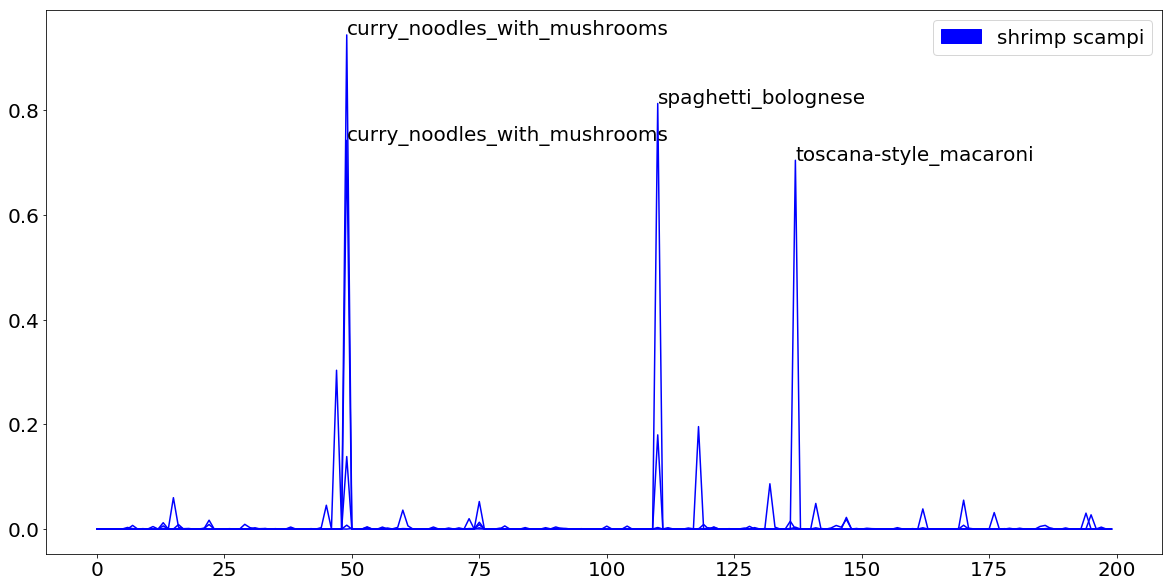

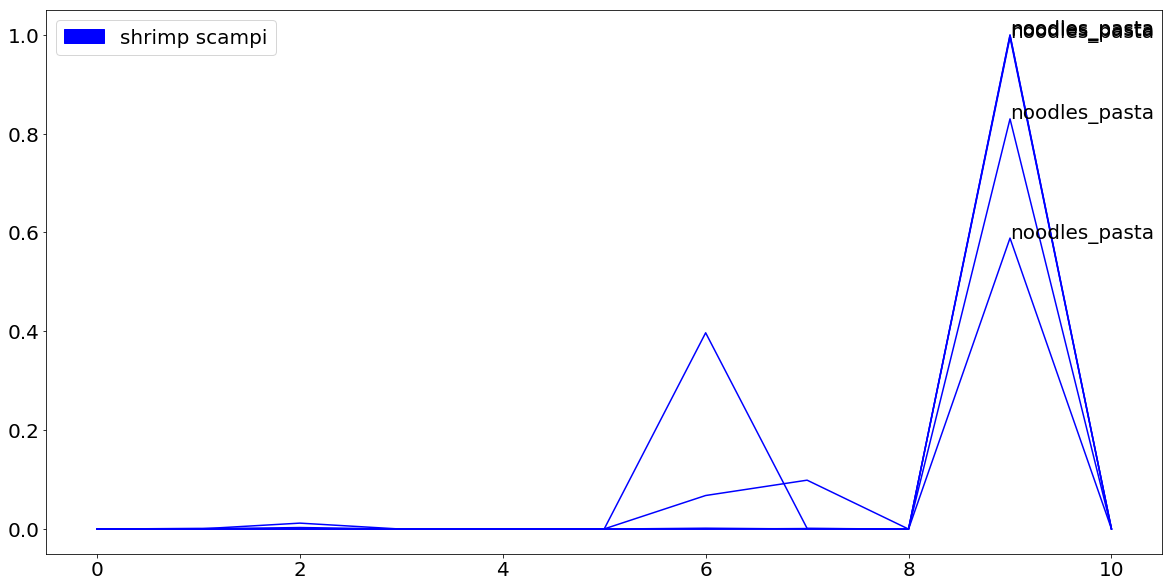

In [52]:
for idx, g in enumerate(groups):
    for s in splitted:
        plt.figure(figsize=(20,10))
        for idx2, s_g in enumerate(random.sample(g[1], number_of_samples)):
            plt.plot(s_g[s[0]:s[1]], colors[idx])
            for x, el in enumerate(s_g[s[0]:s[1]]):
                if el > 0.5:
                    to_show = x
                    d1 = s[2].item()
                    for name in d1.keys():
                        if d1[name] == x:
                            to_show = name
                    plt.annotate(to_show, xy=(x,el))
        patch = mpatches.Patch(color=colors[idx], label=g[0].split("/")[-1].decode("utf-8").encode('ascii', 'ignore'))
        plt.legend(handles=[patch])
        plt.show()

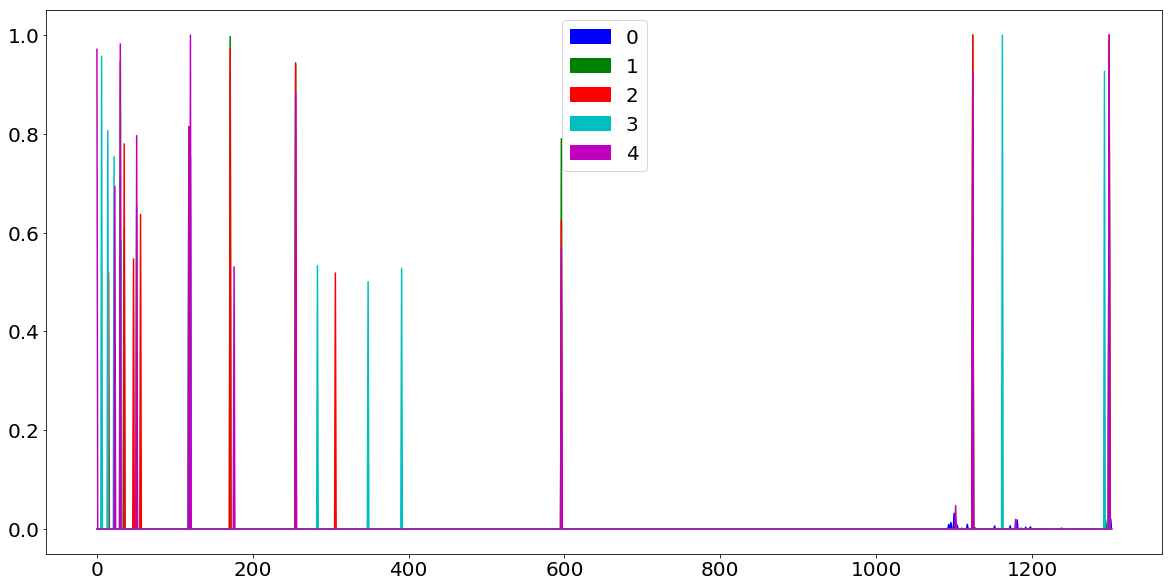

In [10]:
for idx, g in enumerate(groups):
    handles = list()
    plt.figure(figsize=(20,10))
    for idx2, s_g in enumerate(random.sample(g[1], number_of_samples)):
        plt.plot(s_g, colors[idx2])
        patch = mpatches.Patch(color=colors[idx2], label=str(idx2))
        handles.append(patch)
    plt.legend(handles=handles)
    plt.show()

<BarContainer object of 39 artists>

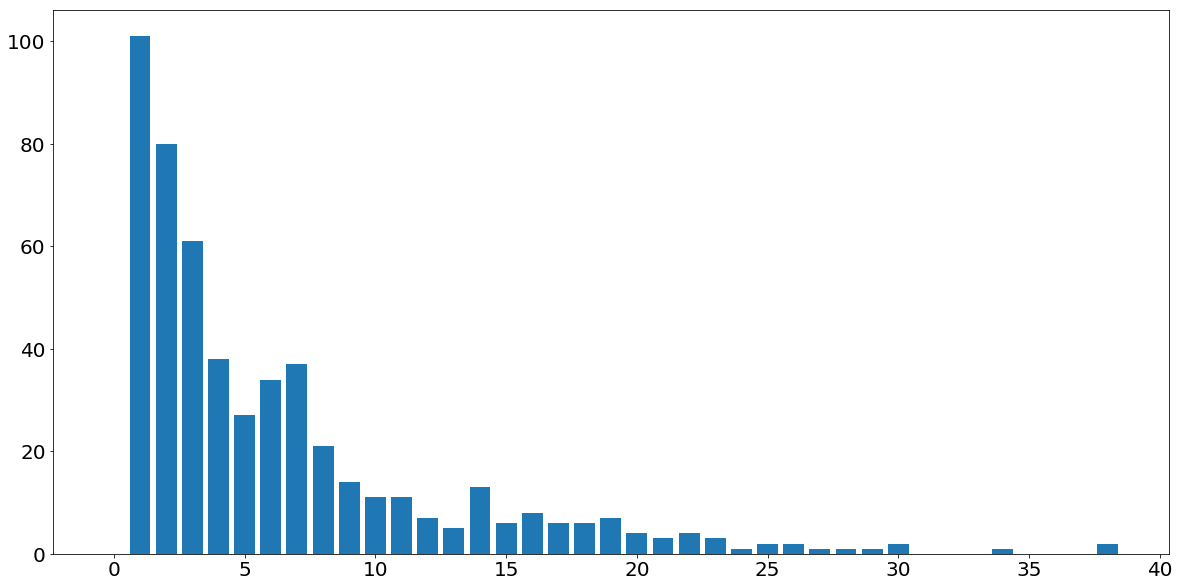

In [11]:
a = [0.0, 101.0, 80.0, 61.0, 38.0, 27.0, 34.0, 37.0, 21.0, 14.0, 11.0, 11.0, 7.0, 5.0, 13.0, 6.0, 8.0, 6.0, 6.0, 7.0, 4.0, 3.0, 4.0, 3.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0]
plt.figure(figsize=(20,10))
plt.bar([i for i in range(len(a))], a)